# Coin tossing 

In [10]:
t <- 0:10
P0 <- 0.5^10*choose(10, t)
P1 <- 0.7^t*0.3^(10-t)*choose(10,t)
cat("type I error, “false positive”: ", sum(P0[8:11]), "\n")
cat("type II error, “false negative”: ",sum(P1[1:7]))
Px <- 0.5*P0+0.5*P1
P0/P1

type I error, “false positive”:  0.171875 
type II error, “false negative”:  0.3503893

[1] 165.38171688  70.87787866  30.37623371  13.01838588   5.57930823
 [6]   2.39113210   1.02477090   0.43918753   0.18822323   0.08066710
[11]   0.03457161

# Comparing models when tossing a coin – again

Formal model setup for coin 1 and 2: 10 tosses are performed 

Likelihood 1: binomial with some p; Likelihood 2: binomial with some p

Prior 1: = 2.0 if $0 ≤ p < 0.5$, zero otherwise; Prior 2: = 2.0 if $0.5 ≤ p ≤ 1.0$, zero otherwise

A priori: both coins should be thrown equally likely $\Rightarrow $

Setup simple: all possible data $x ∈ {0, . . . , 10}$ can be investigated finite parameter interval $p ∈ [0, 1]$

In this set-up the preference for one of the coins is entirely driven by the priors. Parameter estimation does not play a role anywhere here

Why is there a non-zero evidence for coin 1 for $x > 5$, and $x < 5$ for coin 2? 

Exercise: confirm the numbers

x 0 1 2 3 4 5 6 7 8 9 10 
evid.1 .183 .181 .176 .161 .132 .091 .050 .020 .006 .001 .000 
evid.2 .000 .001 .006 .021 .050 .091 .132 .161 .176 .181 .183 
log(Bayes1/2) 3.3 2.2 1.5 0.9 0.4 0 -0.4 -0.9 -1.5 -2.2 -3.3 
p_MAP_1 0 0.1 0.2 0.3 0.4 0.5 0.5 0.5 0.5 0.5 0.5 
p_MAP_2 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.7 0.8 0.9 1 


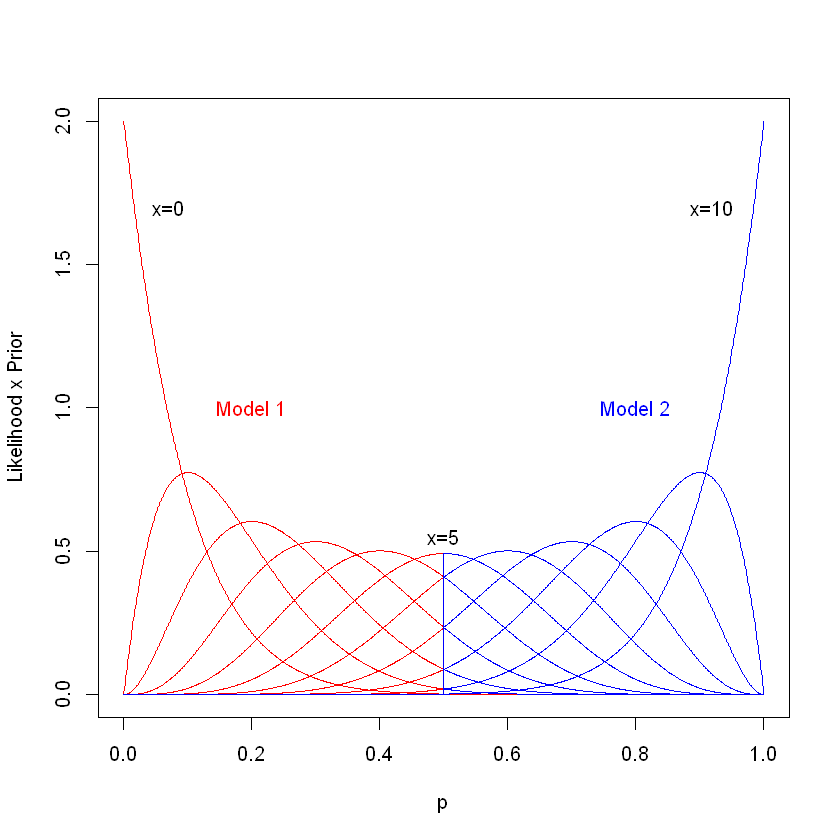

In [20]:
ntoss <- 10
x     <- 0:ntoss
nx    <- length(x)
dp    <- 0.001
p     <- seq(0.0,1.0,dp)
np    <- length(p)

numformat <- function(val) { sub("^(-?)0.", "\\1.", sprintf("%.3f", val)) }

prior1 <- function(p) if (p <  0.5) return(2.0) else return(0.0)
prior2 <- function(p) if (p >= 0.5) return(2.0) else return(0.0)
like1  <- function(x,p) return(dbinom(x,ntoss,p))
like2  <- function(x,p) return(dbinom(x,ntoss,p))
aprio1 <- 0.5
aprio2 <- 0.5

d1 <- matrix(ncol=nx,nrow=np)
d2 <- matrix(ncol=nx,nrow=np)

for (i in 1:np) {
  d1[i,] <- like1(x,p[i])*prior1(p[i]) 
  d2[i,] <- like2(x,p[i])*prior2(p[i]) 
}

evidence1 <- dp*colSums(d1)
evidence2 <- dp*colSums(d2)
bayes12   <- evidence1/evidence2

cat("x",x, "\n")
cat("evid.1",numformat(evidence1), "\n")
cat("evid.2",numformat(evidence2), "\n")
cat("log(Bayes1/2)",round(log10(bayes12),1), "\n")

plot(p,d1[,1],type='n', ylab="Likelihood x Prior")
lines(p,d1[,1], col='red')
for (i in 1:ntoss+1) lines(p,d1[,i], col='red')
for (i in 1:ntoss+1) lines(p,d2[,i], col='blue')
text(0.2,1.0,"Model 1", col='red',adj=0.5)
text(0.8,1.0,"Model 2", col='blue',adj=0.5)
text(0.07,1.7,"x=0",adj=0.5)
text(0.5 ,0.55,"x=5",adj=0.5)
text(0.92,1.7,"x=10",adj=0.5)

p1 <- vector(length=nx)
p2 <- vector(length=nx)
for (i in 1:11) {
  d     <- d1[,i]
  p1[i] <- p[d==max(d)]
  d     <- d2[,i]
  p2[i] <- p[d==max(d)]
}

cat("p_MAP_1",round(p1,2), "\n")
cat("p_MAP_2",round(p2,2), "\n")

# TODO: Exercise – returning to the lighthouse

You worked on the lighthouse problem in the exercises

Suppose you meet somebody claiming that the distance estimate of the lighthouse keeper is wrong and the distance from the shore is rather 1 mile. The lighthouse keeper as well as the other person appear to you equally trustworthy. 

What proposition (dt. Behauptung) is more plausible?

# Z test 

A random variable X is normally distributed with $\sigma^2=9$ and unknown mean $\mu$. You have $n = 10$ samples available drawn from the distribution of X.

Test the hypothesis $\mu = \mu_0 = 24$ against the alternative hypothesis $\mu > \mu_0$ with a significance level $\alpha = 0.05$

$H_0: \mu_0=24, \sigma^2=9, n=10$ samples, $\sigma_{\bar x}=\frac{\sigma}{\sqrt n}=\sqrt {0.9}$

$\alpha=0.05$ significancy number

Alternativ $H_1: \mu_1 > \mu_0$

Question: what is the $\bar x$ threshold?


$P(\bar x > \bar{x}_{crit})=\alpha$

by $\bar{x}_{crit} $ <- qnorm($1-\alpha$, mean = $\mu$, sd = $\sigma_{\bar x}$) we get $\bar{x}_{crit}=25.56$

by $\bar{x}_{crit} $ <- qnorm($1-\alpha$, mean = 0, sd = 1) we get $x_{crit}=1.6$

$\beta=P(\bar x > \bar{x}_{crit}$ | mean = $\mu_1$, sd = $\sigma_{\bar x}$)

In z space: $z = \frac{\bar x - \mu_0}{\sigma_{\bar x}}$ -> N(0, 1) standard normal distribution -> universality of $z_{crit}$


One-sided test: $\alpha$ only on the right side of the curve

Two-sided test: both side 2.5%


operating characteristik statistics

$\int dx \int {dy x P(x,y)}=\int {dx x} \int {dy P(x,y)}$ marginlization $=\int {dx\cdot x\cdot P_Y(x)}$

$\approx \Delta A \sum_i \sum_j {P_{i,j}x_{i,1}}=\Delta A \sum_i {x_{i,1}} \sum_j P_{i,j} =\Delta A \sum_i {x_{i,1}}$colsum($P_{i,j}$)